#Download Libraries
pada penelitian ini, peneliti membutuhkan library python untuk mengolah data, modelling, evaluasi model. untuk library yang tidak tersedia pada google colab akan dilakukan download libraries terlebih dahulu, seperti berikut:

In [ ]:
import nltk
!pip install snscrape
!pip install tpot
!pip install translators --upgrade
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 13.1 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=94a7c1ffd60a706654c86d5e43551ef9933fe474a5438e0b3f4d6a99324036da
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Loo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#Import Libraries
untuk menggunakan libraries python, perlu dilakukan import libraries sebagai berikut:

In [ ]:
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import snscrape.modules.twitter as sntwitter
from nltk.tokenize import word_tokenize
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import translators as ts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
from sklearn import svm
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix as cm
import matplotlib.ticker as mtick
from tpot import TPOTClassifier
from textblob import TextBlob
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib as mpl

Using state South Carolina server backend.


#Pengumpulan Data
dalam penelitian ini, peneliti melakukan scraping data untuk mengumpulkan data twitter keyword ETLE, tilang manual pada geocode indonesia dengan rentang waktu tahun 2022. setelah data berhasil dikumpulkan, data akan di*export* csv untuk masuk ke dalam tahap pre-processing.

In [ ]:
searchs = ['ETLE near:"indonesia"', 'tilang manual near:"indonesia"']
tweets = []
 
tweetLimit = 1000
for search in searchs:
  for tweet in sntwitter.TwitterSearchScraper(search).get_items():
      if len(tweets) == tweetLimit:
          break
      else:
          tweets.append([tweet.date, tweet.username, tweet.content])
tweetsDF = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
# tweetsDF.to_csv('raw_dataset.csv')
tweetsDF.head()

#Pre-Processing Data
setelah data berhasil di scraping, maka langkah selanjutnya data akan dilakukan pra-pemrosesing data yaitu: data filtering, translate, case folding, remove stopword, stemming, tokenization.

##Data Filtering
tahapan pertama dalam pra-pemrosesan data, yaitu data filtering. data filtering pada penelitian ini akan dilakukan di google sheet untuk memfilter data dari data yang tidak berhubungan.

##Labelling Data
setelah dilakukan data filtering, maka tahapan selanjutnya, yaitu labelling data. labelling data pada penelitian ini akan dilakukan pemberian label ke data dengan 2 label;positif dan negatif. setelah data melalui tahapan data filtering dan labelling data, maka akan dilakukan load dataset sebagai berikut:

##Translate Data
tahapan selanjutnya akan dilakukan translate data dari bahasa indonesia ke english(US).

In [ ]:
tweetsDF = pd.read_csv('/content/dataset_etle.csv')
tweetsDF.head()

In [ ]:
print(f"data has {tweetsDF.duplicated().sum()} duplicated data")
print(f"data has \n{tweetsDF.isnull().sum()} \nnull data")

data has 0 duplicated data
data has 
Unnamed: 0    0
Date          0
User          0
Tweet         0
translate     0
dtype: int64 
null data


In [ ]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  691 non-null    int64 
 1   Date        691 non-null    object
 2   User        691 non-null    object
 3   Tweet       691 non-null    object
 4   translate   691 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.1+ KB


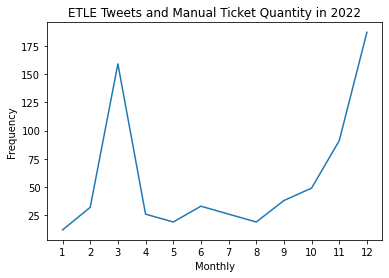

In [ ]:
tweetsDF['Date'] = pd.to_datetime(tweetsDF['Date'], errors='coerce')
plotting_monthly = tweetsDF.groupby(tweetsDF.Date.dt.month)['Tweet'].count()
sns.lineplot(x = plotting_monthly.index, palette=['o'] , y = plotting_monthly)
plt.title('ETLE Tweets and Manual Ticket Quantity in 2022')
# xticks dari 1 - 12
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Frequency')
plt.xlabel('Monthly')
mpl.rcParams['figure.dpi'] = 300
plt.show()

In [ ]:
def pre_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    tweet = re.sub('https', ' ', tweet)
    tweet = re.sub('@[^\s]+',' ',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.strip('\'"')
    return tweet

max Tweet_content len: 77


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


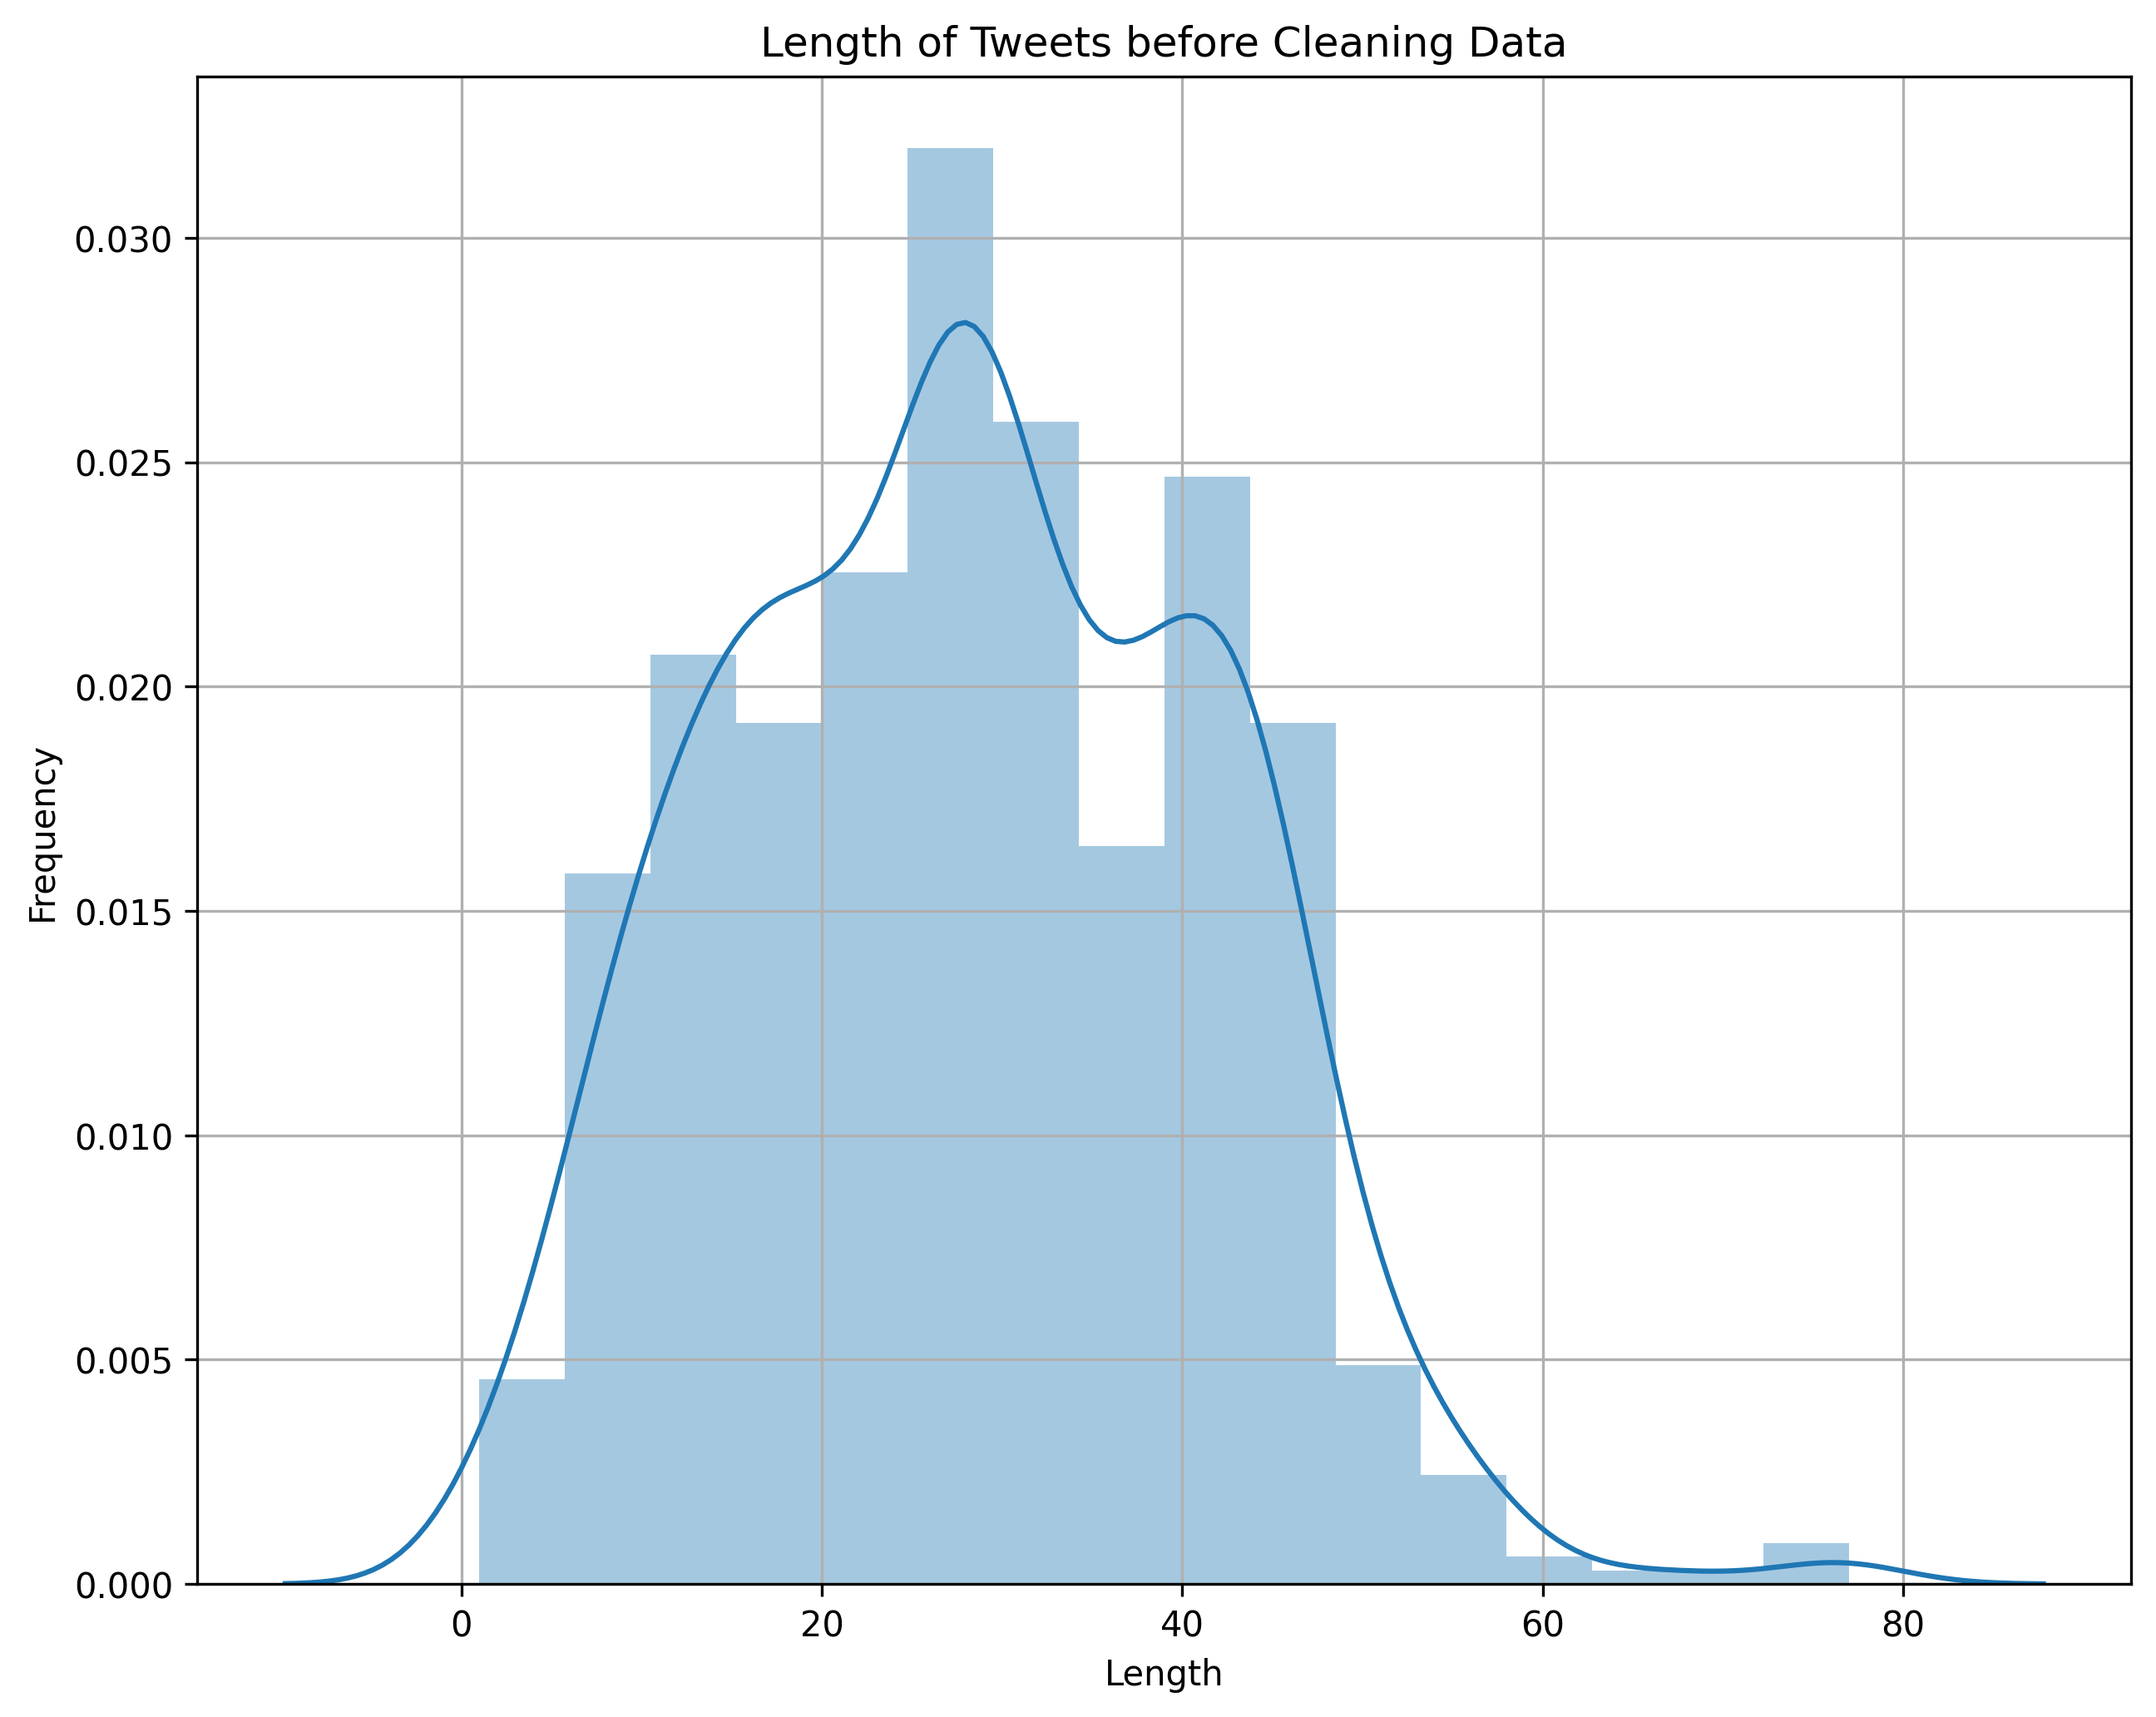

In [ ]:
Tweet_content_len = tweetsDF['translate'].apply(lambda p: len(p.split(' ')))
max_Tweet_content_len = Tweet_content_len.max()
print('max Tweet_content len: {0}'.format(max_Tweet_content_len))
plt.figure(figsize = (10, 8))
sns.distplot(Tweet_content_len)
plt.title('Length Distribution of Tweets')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length of Tweets before Cleaning Data')
plt.grid()

In [ ]:
tweetsDF['translate'].replace(regex=True, to_replace=['ð'], value='', inplace=True)

In [ ]:
tweetsDF['translate'] = tweetsDF['translate'].apply(lambda x : pre_processing(x))
tweetsDF.head()

,Unnamed: 0,Date,User,Tweet,translate
0,0,2022-12-30 11:53:53+00:00,WaspadaOnline,200 Ribu Pelanggar Lalu Lintas Terekam ETLE Se...,200 thousand traffic violators recorded etle t...
1,1,2022-12-30 11:50:04+00:00,jpnncom,Polresta Banjarmasin Terapkan Tilang di 3 Loka...,banjarmasin polresta applies a ticket in 3 loc...
2,2,2022-12-30 11:15:38+00:00,onlinesumeks,Sepanjang 2022 Angka Kriminalitas di Sumsel Tu...,during 2022 the crime rate in south sumatra dr...
3,3,2022-12-30 08:34:24+00:00,Tuntastuntas1,Ribuan Kenderaan Terjaring Tilang ETLE di Seju...,thousands of vehicles netted etle tickets in a...
4,4,2022-12-30 04:23:13+00:00,jurnascom,2 633 Kendraan Melanggar Lalu Lintas Tertangka...,2 633 kendraan violates traffic caught on came...


max Tweet_content len: 74


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


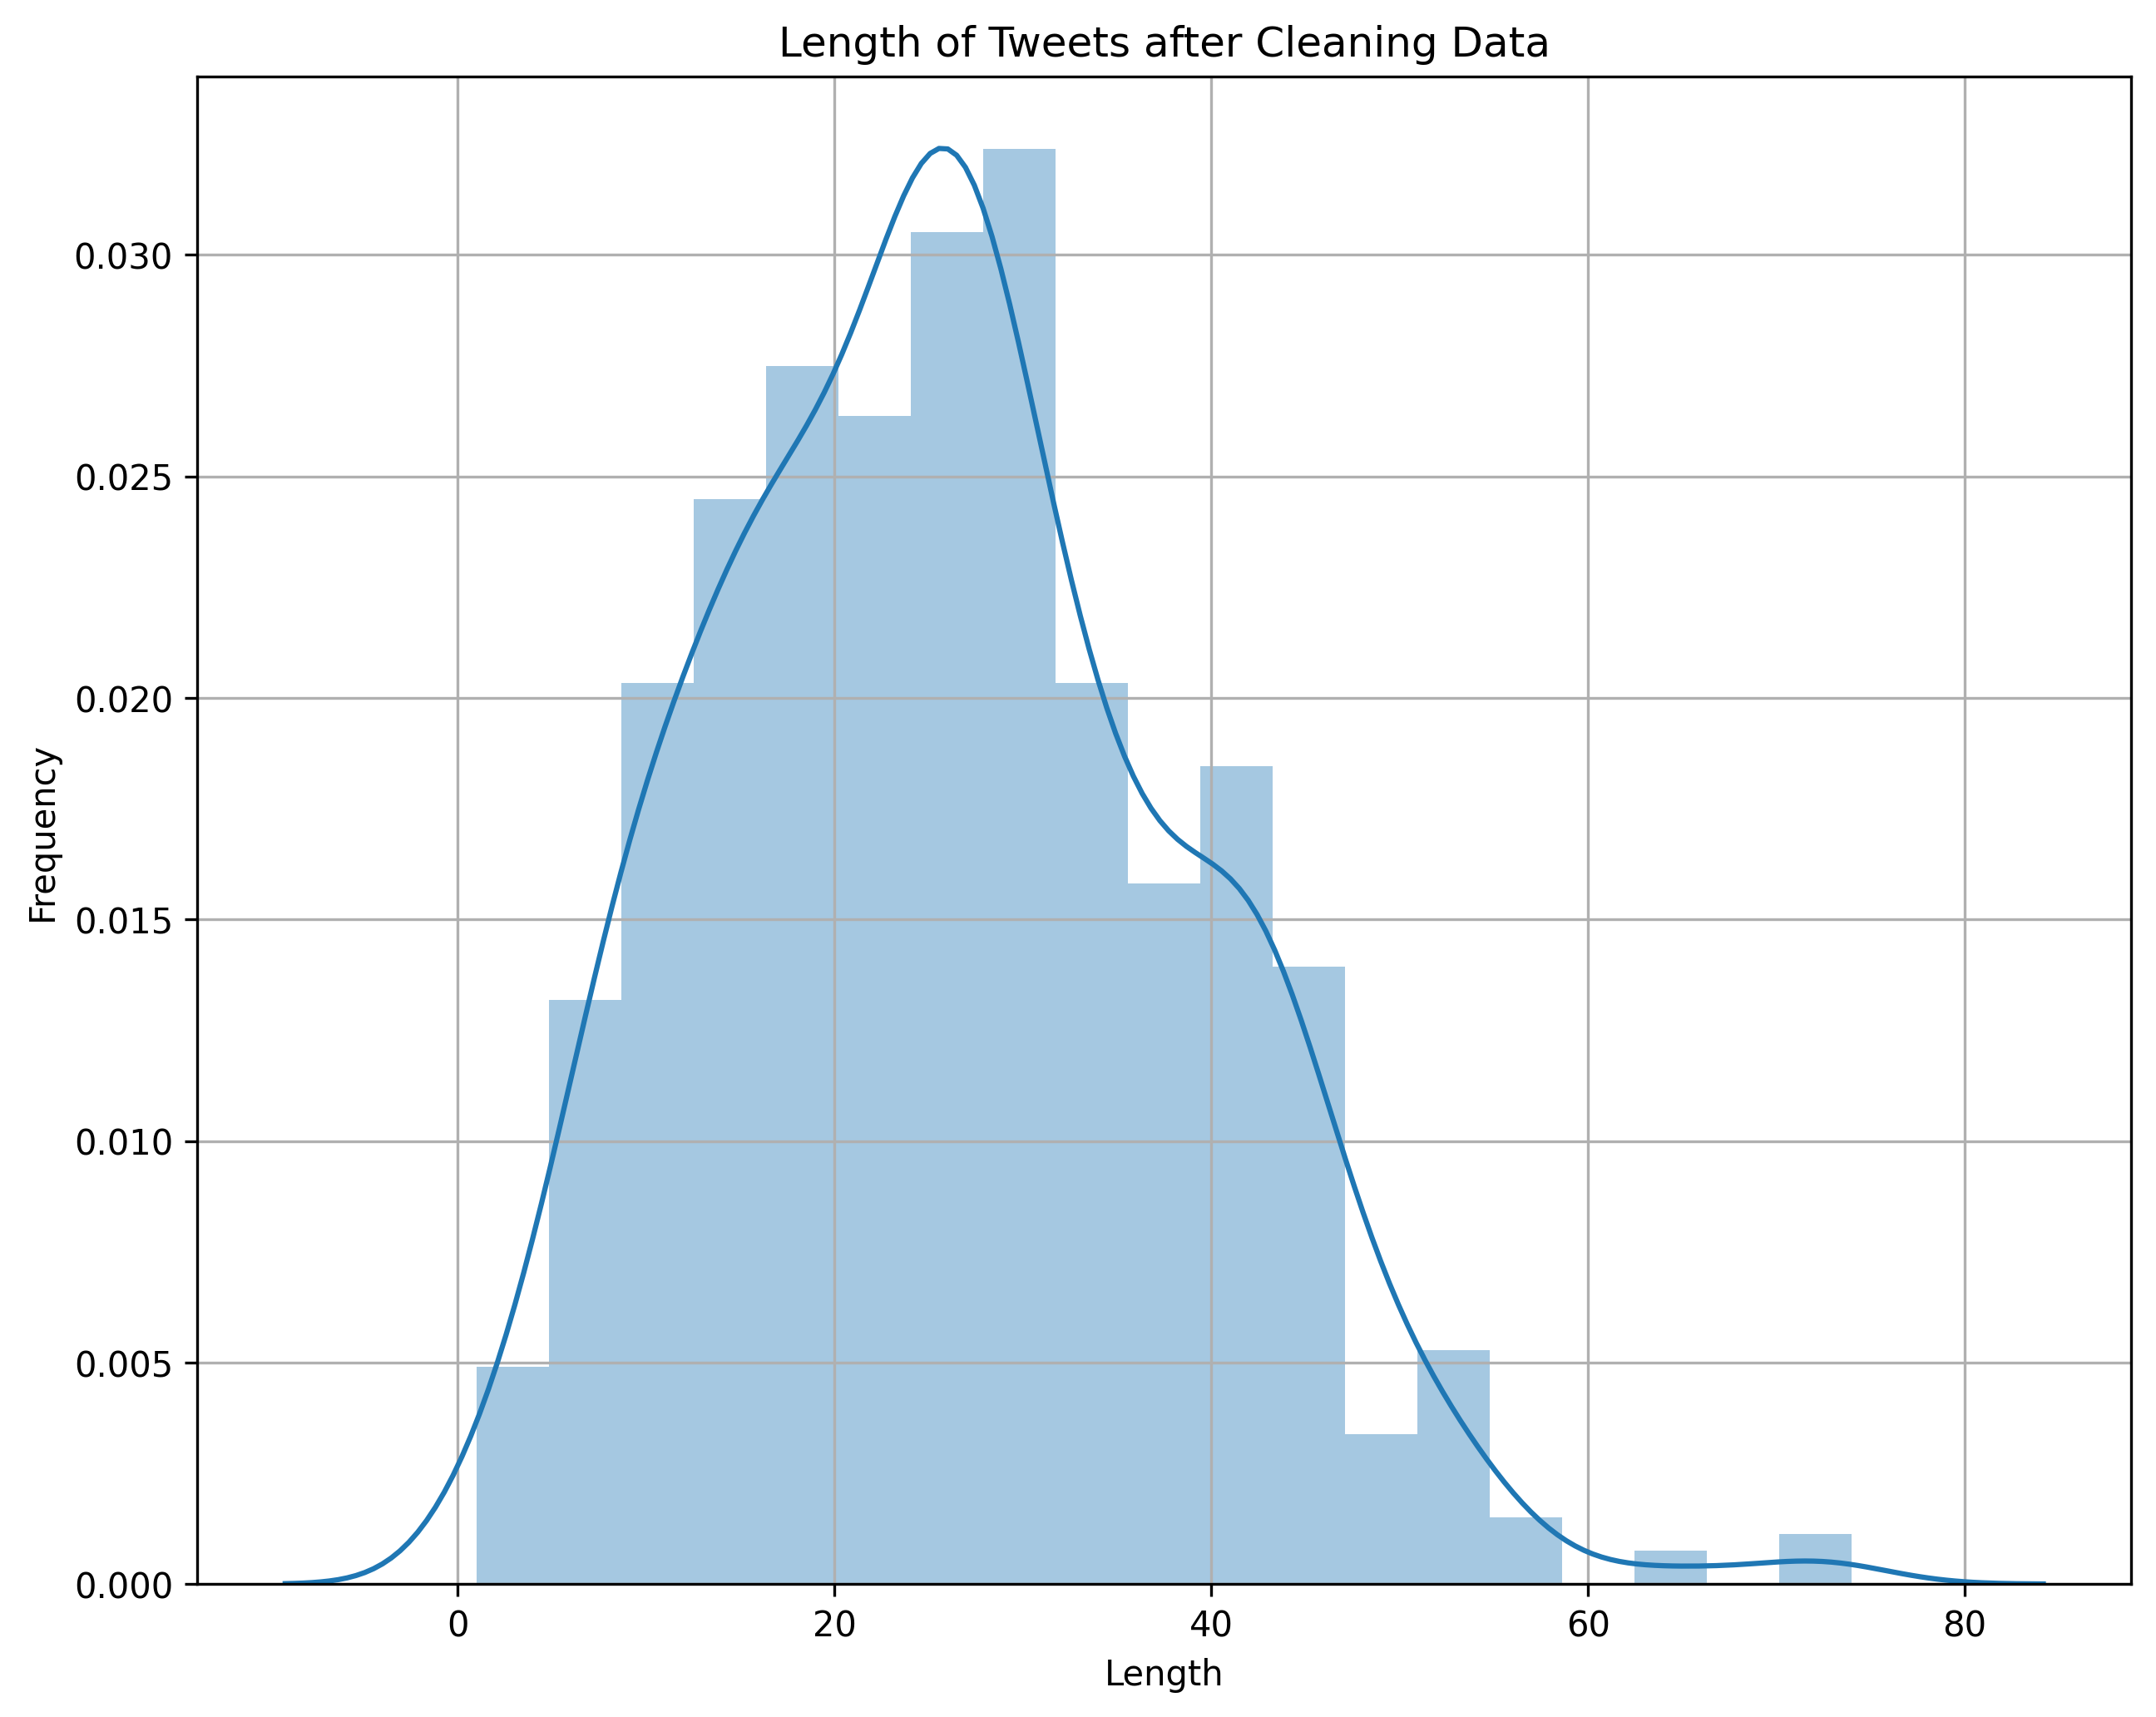

In [ ]:
Tweet_content_len = tweetsDF['translate'].apply(lambda p: len(p.split(' ')))
max_Tweet_content_len = Tweet_content_len.max()
print('max Tweet_content len: {0}'.format(max_Tweet_content_len))
plt.figure(figsize = (10, 8))
sns.distplot(Tweet_content_len)
plt.title('Length Distribution of Tweets')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length of Tweets after Cleaning Data')
plt.grid()

In [ ]:
tweetsDF['review_len'] = tweetsDF['translate'].astype(str).apply(len)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

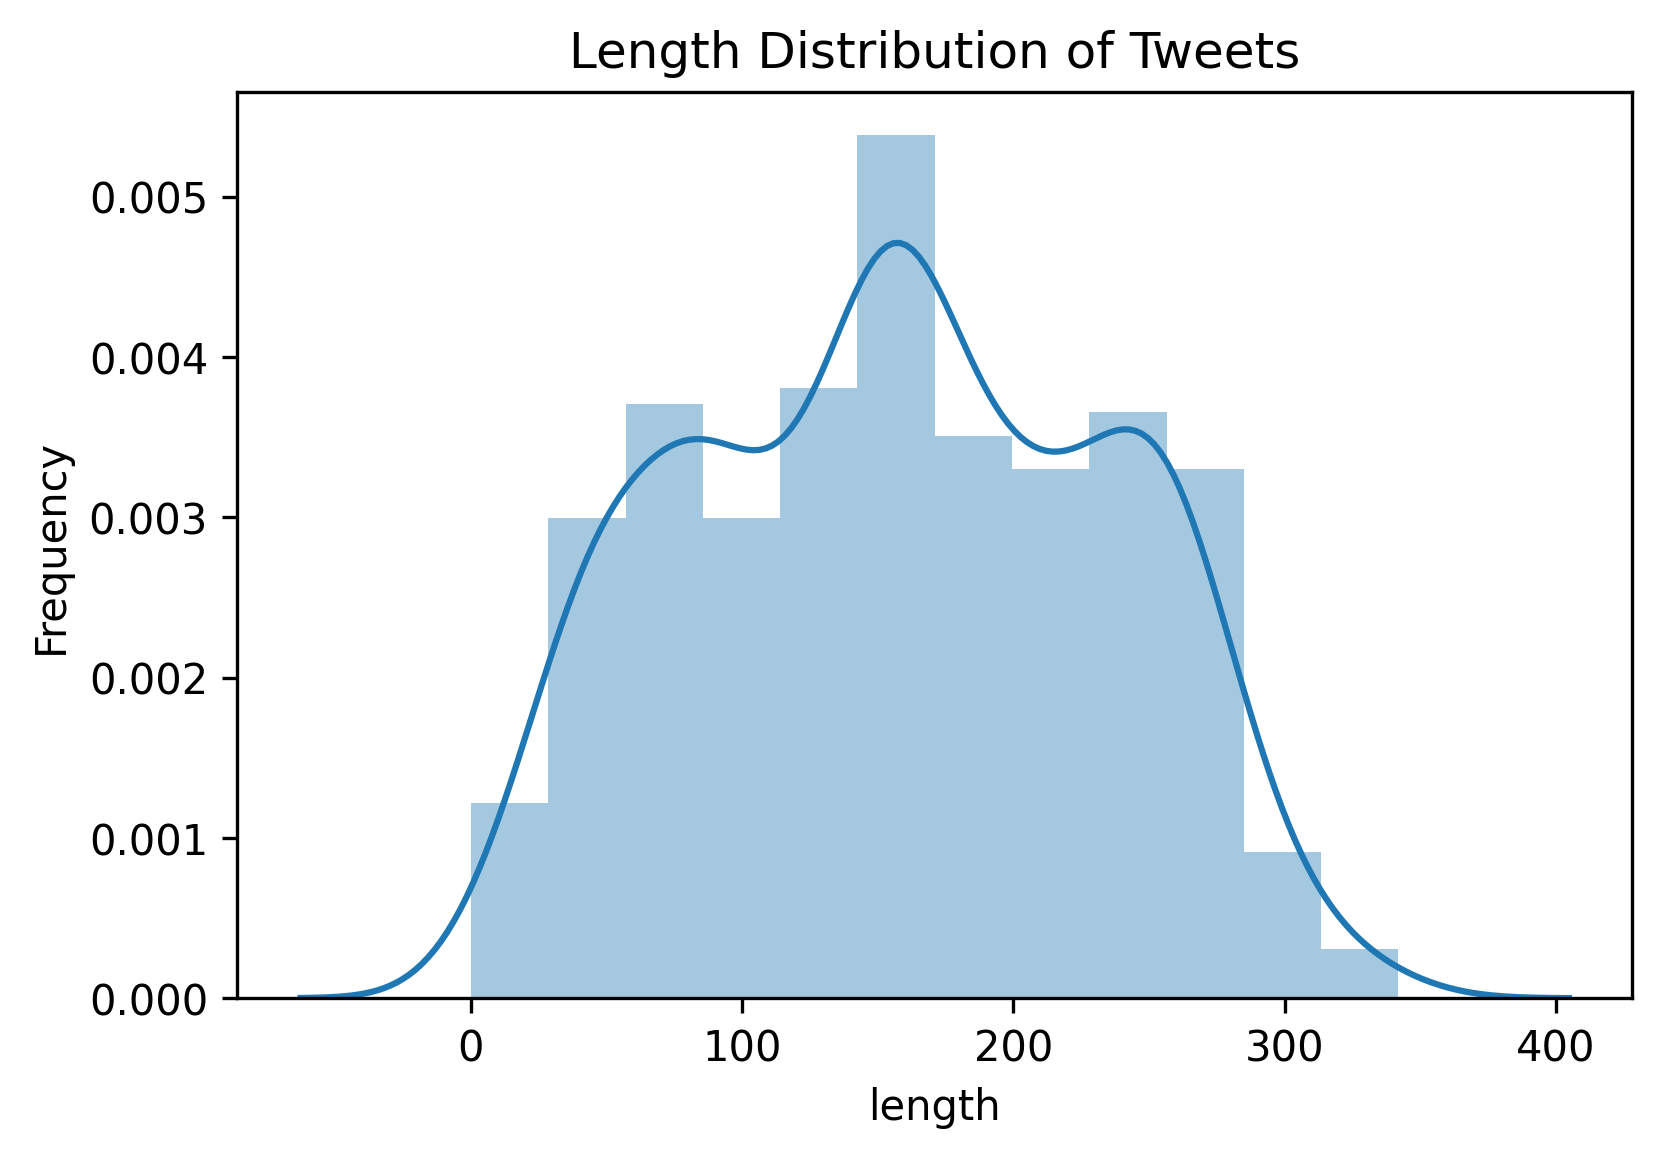

In [ ]:
sns.distplot(tweetsDF['review_len'])
plt.title('Length Distribution of Tweets')
plt.xlabel('length')
plt.ylabel('Frequency')

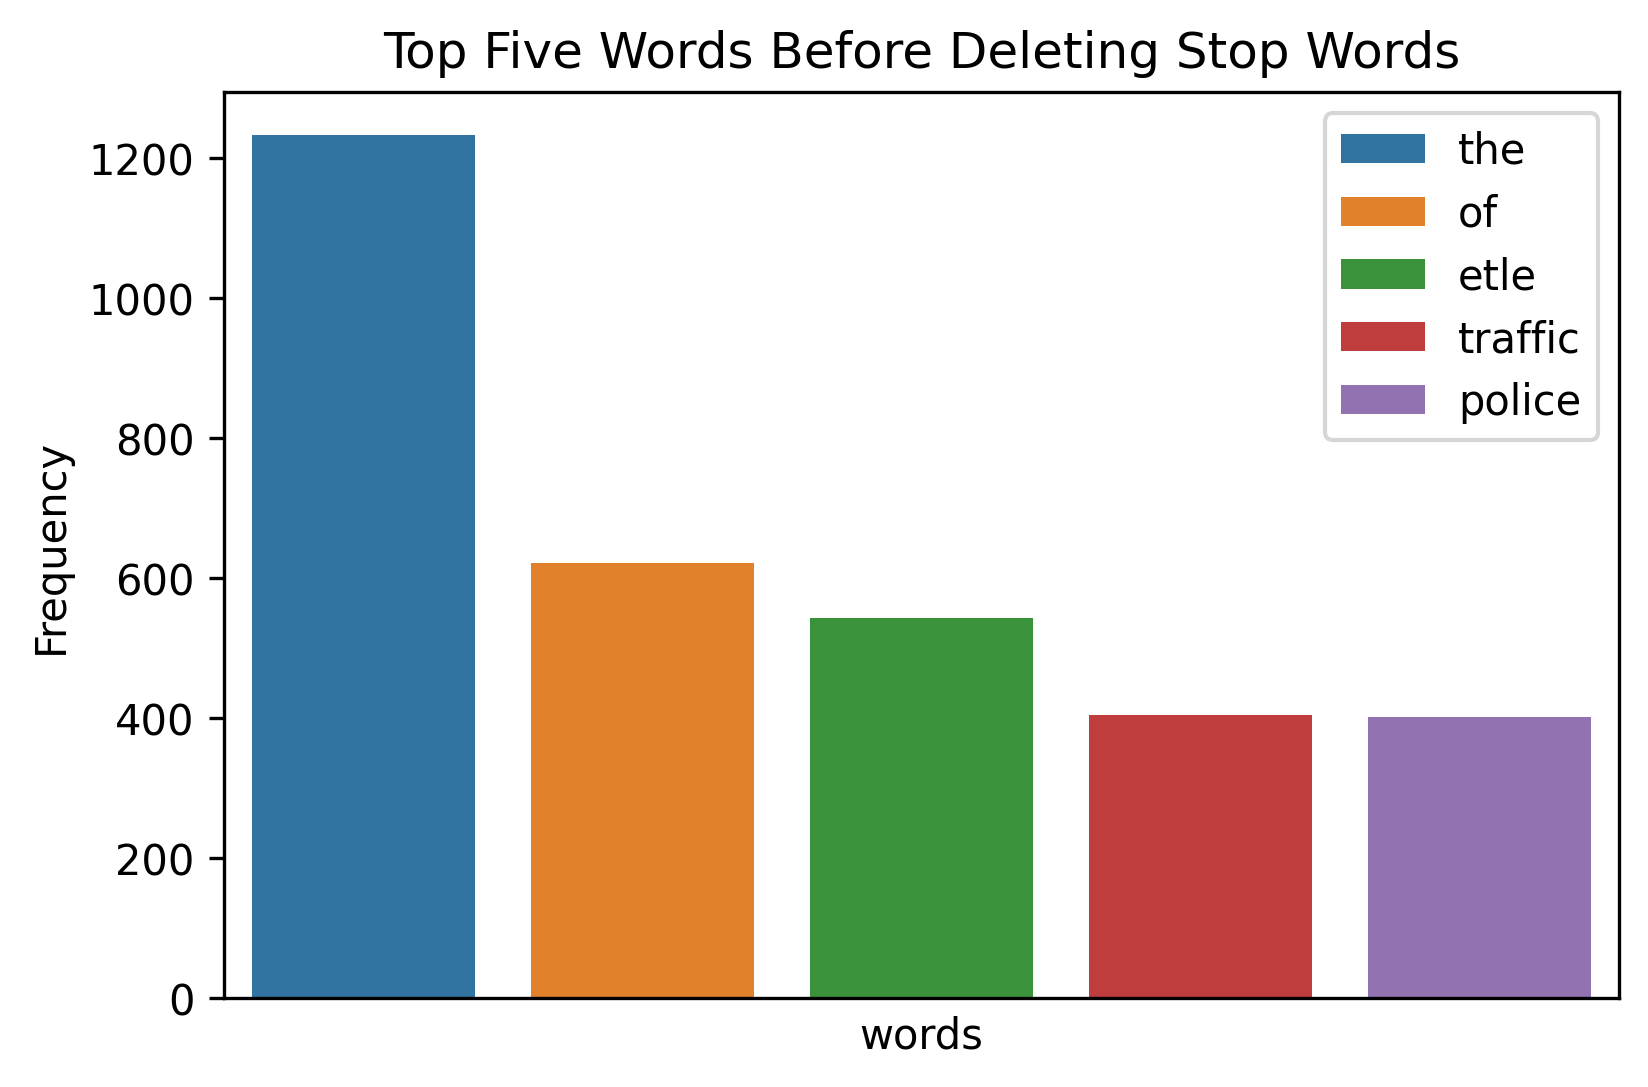

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweetsDF['translate'], 5)
df1 = pd.DataFrame(common_words, columns = ['translate' , 'count'])
# df1.groupby('translate').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar', title='Top 10 words in tweet before removing stop words',fc='orange')
sns.barplot(x='translate', y='count', data=df1, hue='translate', dodge=False)
plt.title('Top Five Words Before Deleting Stop Words')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('words')
plt.ylabel('Frequency')
plt.legend(loc=1)

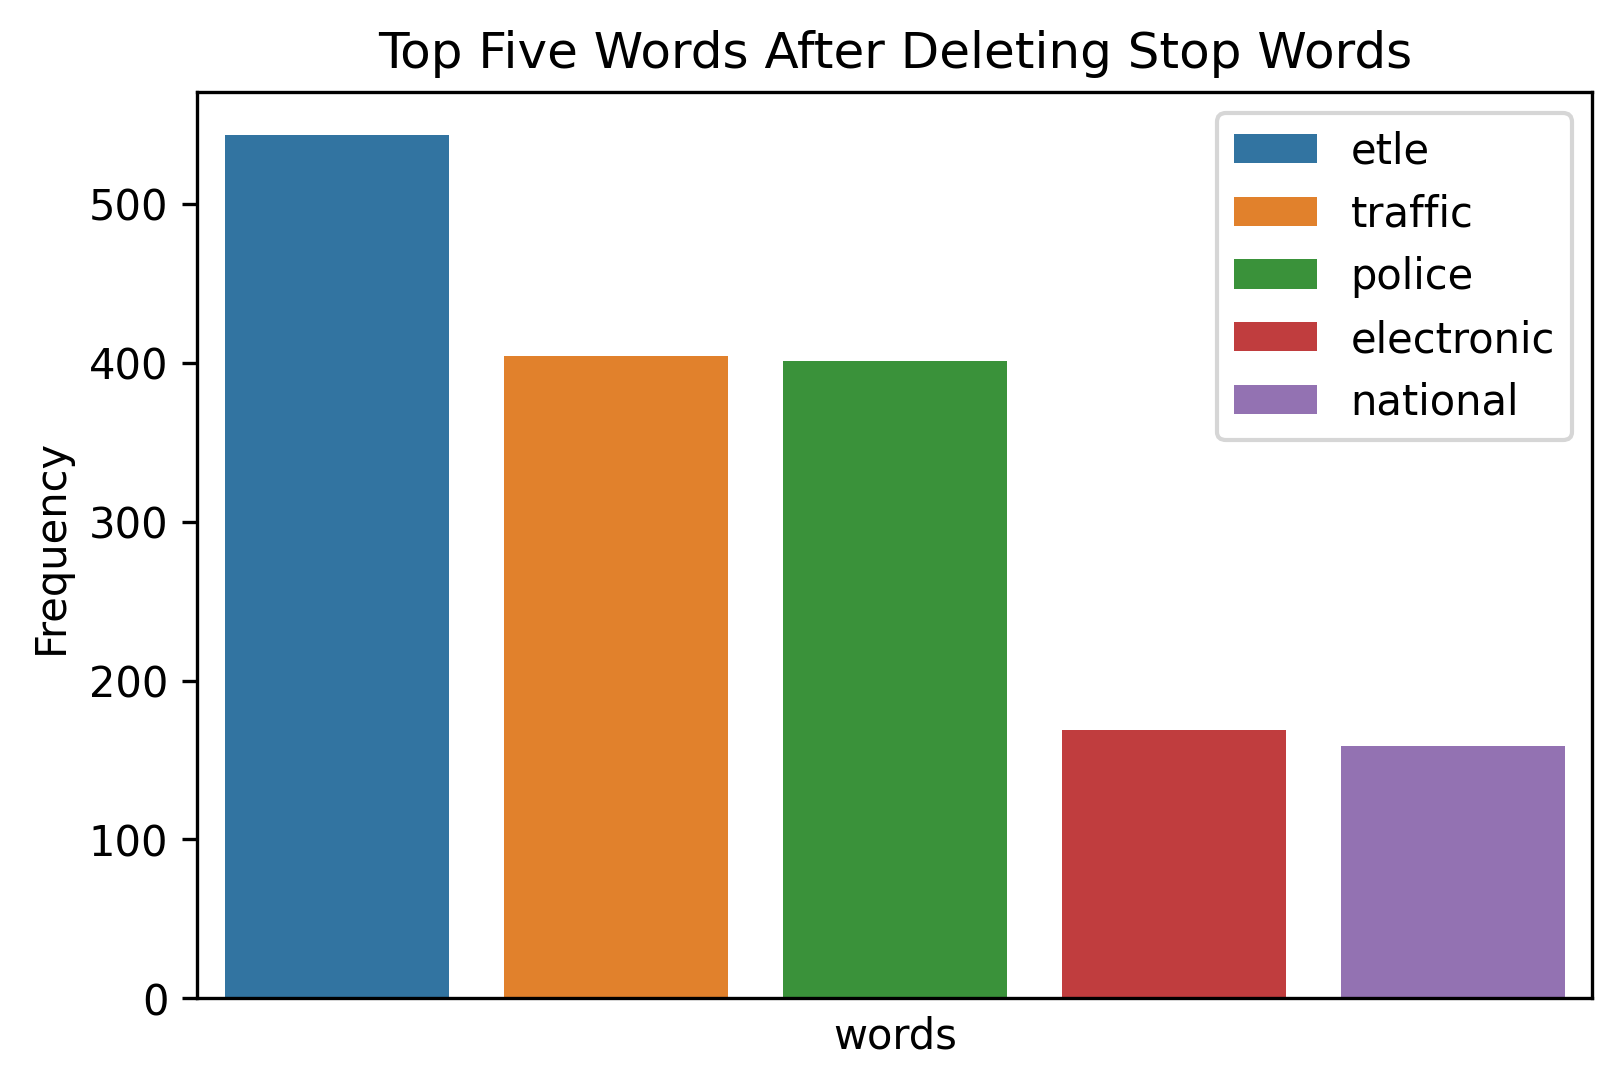

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweetsDF['translate'], 5)
df2 = pd.DataFrame(common_words, columns = ['translate' , 'count'])
# df2.groupby('translate').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar', title='10 kata teratas setelah proses remove stopword',fc='rgbkymc')
sns.barplot(x='translate', y='count', data=df2, hue='translate',dodge=False)
plt.title('Top Five Words After Deleting Stop Words')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('words')
plt.ylabel('Frequency')
plt.legend(loc=1)
# df2.countplot()

In [ ]:
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in tweet.split()]) for tweet in corpus]
def get_lemmatize_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) for tweet in corpus]

In [ ]:
no_stop_words_tweet = remove_stop_words(tweetsDF['translate'])

In [ ]:
tweetsDF['translate'] = get_lemmatize_text(no_stop_words_tweet)
tweetsDF.head()

,Unnamed: 0,Date,User,Tweet,translate,review_len
0,0,2022-12-30 11:53:53+00:00,WaspadaOnline,200 Ribu Pelanggar Lalu Lintas Terekam ETLE Se...,200 thousand traffic violator recorded etle th...,70
1,1,2022-12-30 11:50:04+00:00,jpnncom,Polresta Banjarmasin Terapkan Tilang di 3 Loka...,banjarmasin polresta applies ticket 3 location...,97
2,2,2022-12-30 11:15:38+00:00,onlinesumeks,Sepanjang 2022 Angka Kriminalitas di Sumsel Tu...,2022 crime rate south sumatra dropped accident...,86
3,3,2022-12-30 08:34:24+00:00,Tuntastuntas1,Ribuan Kenderaan Terjaring Tilang ETLE di Seju...,thousand vehicle netted etle ticket number are...,77
4,4,2022-12-30 04:23:13+00:00,jurnascom,2 633 Kendraan Melanggar Lalu Lintas Tertangka...,2 633 kendraan violates traffic caught camera ...,54


In [ ]:
#negative 0, positif 1
def generate_sentiment(tweet):
  def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
  #Create a function to get the polarity
  def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
  tweet['TextBlob_Subjectivity'] = tweet['translate'].apply(getSubjectivity)
  tweet['TextBlob_Polarity'] = tweet['translate'].apply(getPolarity)
  def getAnalysis(score):
    if score < 0:
      return 0
    elif score == 0:
      return 2
    else:
      return 1
  tweet['sentimen'] = tweet['TextBlob_Polarity'].apply(getAnalysis )
  return tweet

In [ ]:
generate_sentiment(tweetsDF)

,Unnamed: 0,Date,User,Tweet,translate,review_len,TextBlob_Subjectivity,TextBlob_Polarity,sentimen
0,0,2022-12-30 11:53:53+00:00,WaspadaOnline,200 Ribu Pelanggar Lalu Lintas Terekam ETLE Se...,200 thousand traffic violator recorded etle th...,70,0.00,0.000000,2
1,1,2022-12-30 11:50:04+00:00,jpnncom,Polresta Banjarmasin Terapkan Tilang di 3 Loka...,banjarmasin polresta applies ticket 3 location...,97,0.00,0.000000,2
2,2,2022-12-30 11:15:38+00:00,onlinesumeks,Sepanjang 2022 Angka Kriminalitas di Sumsel Tu...,2022 crime rate south sumatra dropped accident...,86,0.95,0.600000,1
3,3,2022-12-30 08:34:24+00:00,Tuntastuntas1,Ribuan Kenderaan Terjaring Tilang ETLE di Seju...,thousand vehicle netted etle ticket number are...,77,0.00,0.000000,2
4,4,2022-12-30 04:23:13+00:00,jurnascom,2 633 Kendraan Melanggar Lalu Lintas Tertangka...,2 633 kendraan violates traffic caught camera ...,54,0.00,0.000000,2
...,...,...,...,...,...,...,...,...,...
686,686,2021-09-01 14:15:48+00:00,eddie_toyota,Mulai minggu ini akan berlaku penindakan tilan...,starting week ticket action apply either etle ...,196,0.20,0.066667,1
687,687,2019-07-25 14:23:13+00:00,amygdalhjk,@Nindikusuma_ @PenjahatGunung Dijogja cuman ma...,dijogja use manual ticket,32,0.00,0.000000,2
688,688,2017-01-03 08:05:23+00:00,hamiyatun,di @KejaksaanRI cabang jakarta timur. Adminis...,east jakarta branch administration unclear sti...,126,0.50,0.500000,1
689,689,2015-04-10 02:36:30+00:00,rezaprad,Abis ngasih kertas tilang...\n\nNunggu sidang ...,giving ticket waiting trial called manual usin...,114,0.00,0.000000,2


In [ ]:
tweetsDF = tweetsDF[tweetsDF['sentimen']!=2]
tweetsDF.head()

,Unnamed: 0,Date,User,Tweet,translate,review_len,TextBlob_Subjectivity,TextBlob_Polarity,sentimen
2,2,2022-12-30 11:15:38+00:00,onlinesumeks,Sepanjang 2022 Angka Kriminalitas di Sumsel Tu...,2022 crime rate south sumatra dropped accident...,86,0.950000,0.600000,1
5,5,2022-12-30 02:36:08+00:00,RTMCRiau,Giat pemantauan arus lalu lintas Kota Pekanbar...,active monitoring pekanbaru city traffic flow ...,162,0.625000,0.108333,1
9,9,2022-12-29 16:01:09+00:00,LantasPBM,Giat sosialisasi ETLE dan App Smart City Dulur...,etle etle app smart city dulur kito prabumulih...,226,0.642857,0.214286,1
10,10,2022-12-29 14:42:34+00:00,nkkdbr,"Saya warga bdg yg ke jkt di weekday ini, saya ...",resident bdg go jkt weekday use gmaps io even ...,260,0.216667,-0.055556,0
12,12,2022-12-29 12:24:46+00:00,noele_dee26,@agot_isidro Lumabas sa cinema na maga ang mat...,lumabas sa cinema na maga ang mata really rela...,278,0.490000,0.110000,1


In [ ]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 2 to 688
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0             402 non-null    int64              
 1   Date                   402 non-null    datetime64[ns, UTC]
 2   User                   402 non-null    object             
 3   Tweet                  402 non-null    object             
 4   translate              402 non-null    object             
 5   review_len             402 non-null    int64              
 6   TextBlob_Subjectivity  402 non-null    float64            
 7   TextBlob_Polarity      402 non-null    float64            
 8   sentimen               402 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 31.4+ KB


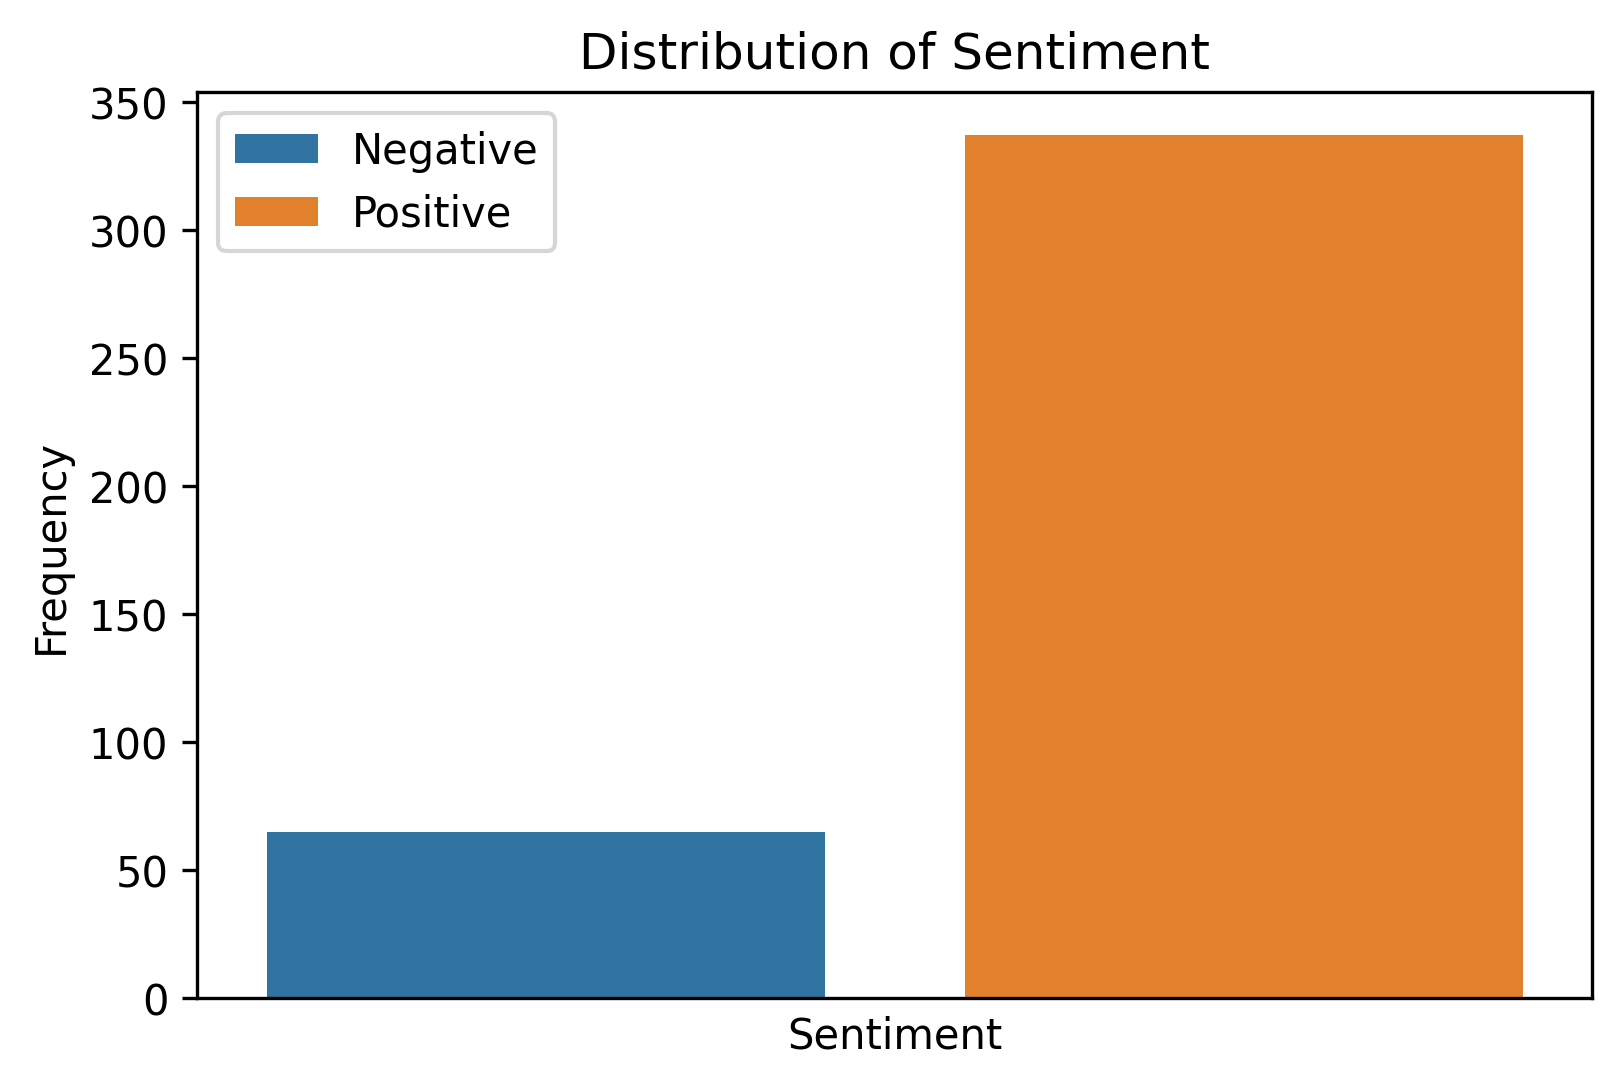

In [ ]:
sns.countplot(x=tweetsDF['sentimen'], hue=tweetsDF['sentimen'],dodge=False)
plt.title('Distribution of Sentiment')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.legend(labels=["Negative", 'Positive'])
#beda warna antara sentimen 1 dan 0

In [ ]:
tweetsDF['sentimen'] = tweetsDF['sentimen'].astype('int')
x = tweetsDF['translate']
y = tweetsDF['sentimen']
y = np.array(y)

<ipython-input-31-b5e71f0a9434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDF['sentimen'] = tweetsDF['sentimen'].astype('int')


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer 
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True)
x=tv.fit_transform(x)
print('Tfidf_tweet:',x.shape)

Tfidf_tweet: (402, 1028)


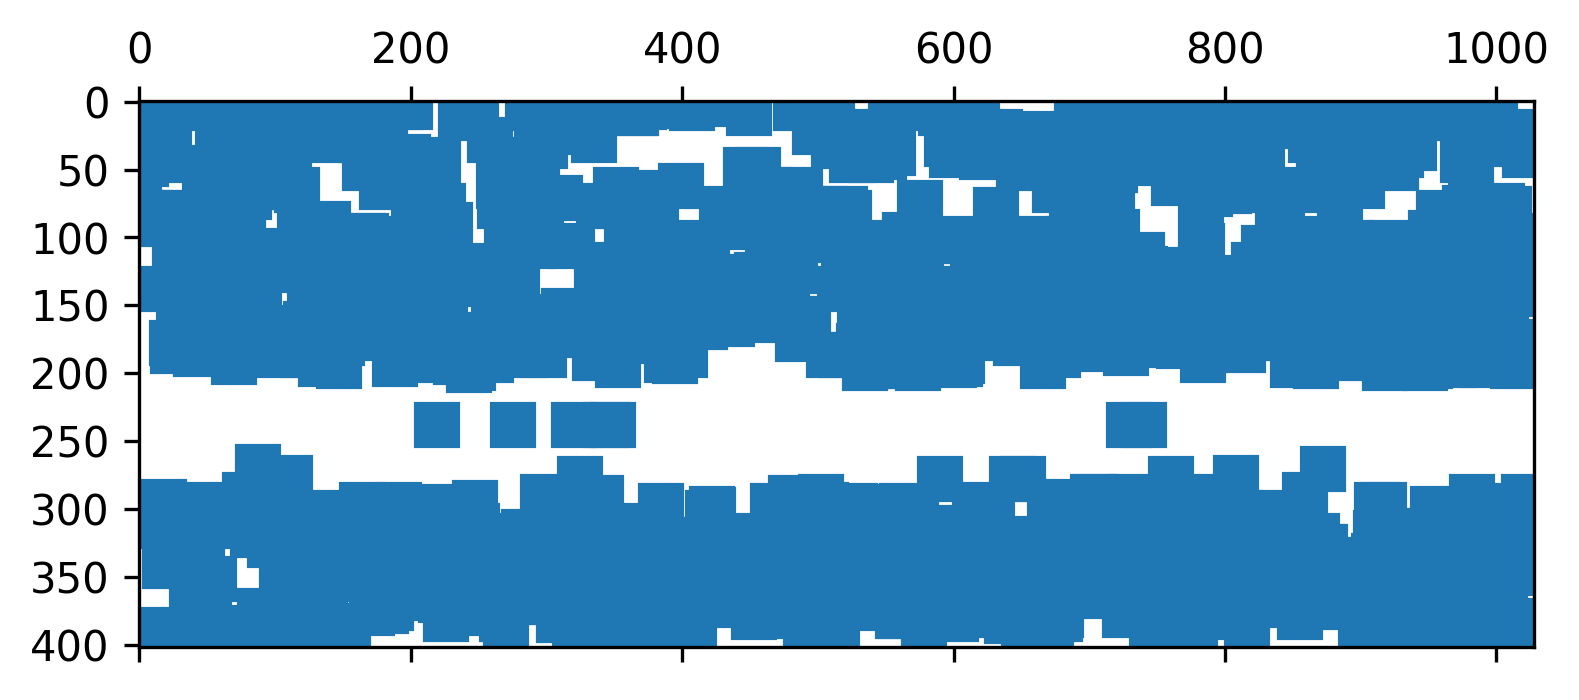

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x)
x = scaler.transform(x)
plt.spy(x)

In [ ]:
over = SMOTE(sampling_strategy=0.6, random_state=8)
under = RandomUnderSampler(sampling_strategy=0.6, random_state=8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, Y = pipeline.fit_resample(x, y)
counter = Counter(Y)
print(counter)

Counter({1: 336, 0: 202})


In [ ]:
over = SMOTE(sampling_strategy=0.6, random_state=8)
under = RandomUnderSampler(sampling_strategy=0.6, random_state=8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_over_under, Y_over_under = pipeline.fit_resample(x, y)
counter = Counter(Y)
print(counter)

Counter({1: 336, 0: 202})


In [ ]:
rus = RandomUnderSampler(sampling_strategy={0:50, 1:50})
X_50, y_50 = rus.fit_resample(x, y)
counter = Counter(y_50)
print(counter)

Counter({0: 50, 1: 50})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


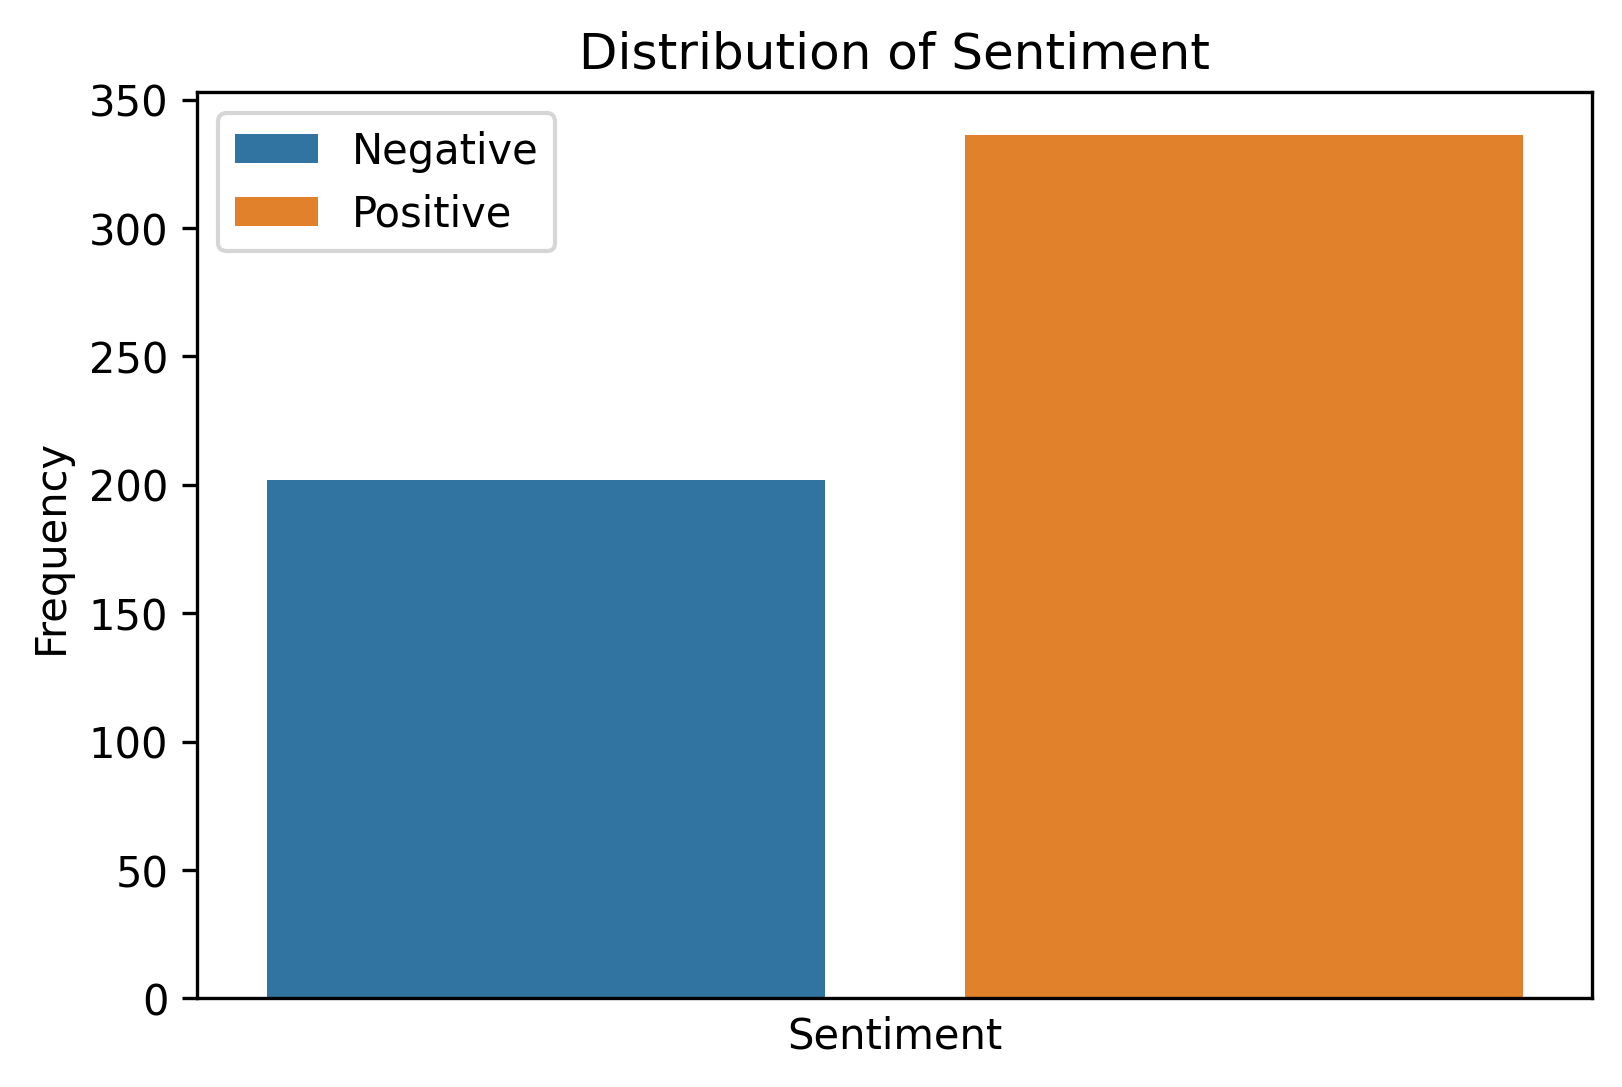

In [ ]:
sns.countplot(Y,hue=Y,dodge=False)
plt.title('Distribution of Sentiment')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend(labels=["Negative", 'Positive'])

In [ ]:
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(X, Y, train_size = 0.90, random_state=10)
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(X, Y, train_size = 0.80, random_state=10)
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(X, Y, train_size = 0.70, random_state=10)
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(X, Y, train_size = 0.60, random_state=10)
x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(X, Y, train_size = 0.50, random_state=10)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'sigmoid', 'poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, scoring = 'accuracy')
  
# fitting the model for grid search
grid.fit(X_over_under, Y_over_under)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.954 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.888 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.630 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             scoring='accuracy', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')


In [ ]:
predict = grid.predict(X_over_under)
round(accuracy_score(Y_over_under, predict),2)

0.98

In [ ]:
percobaan = [[X_over_under, Y_over_under], [X_50, y_50]]
akurasi = []
for i in percobaan:
  model = svm.SVC(C=10, gamma=1, kernel = 'sigmoid', probability = True)
  model.fit(i[0], i[1])
  predict = model.predict(i[0])
  akurasi.append(round(accuracy_score(i[1], predict),2))
print(akurasi)

[0.98, 0.96]


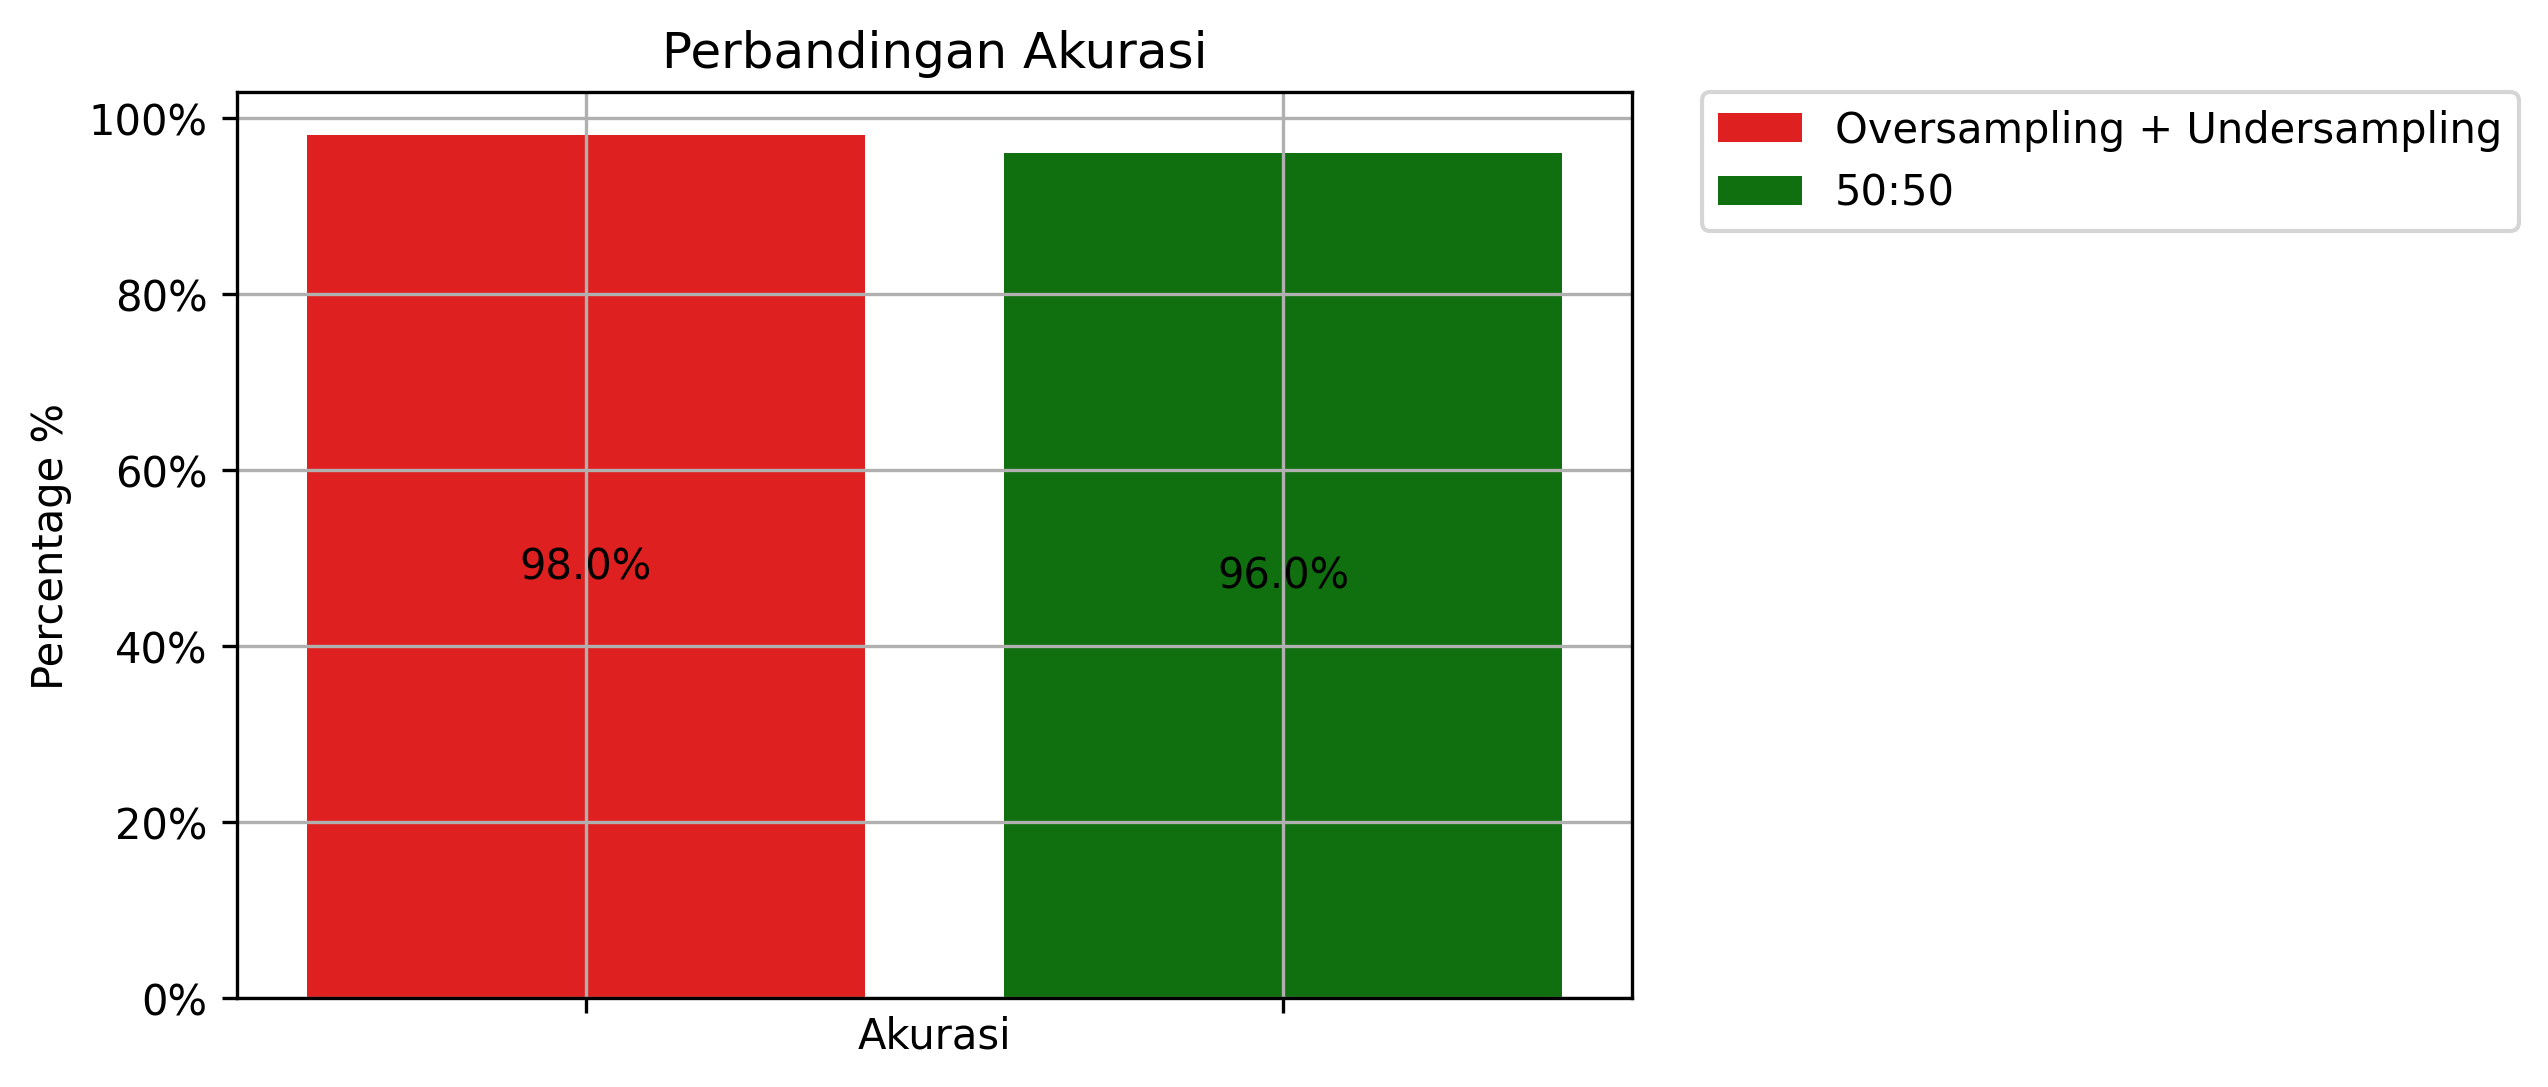

In [ ]:
colors = ['red', 'green']
x_labels = ['Oversampling + Undersampling', '50:50']

data = {'Akurasi':x_labels, 'Values':akurasi}
df = pd.DataFrame(data)

bar_plot = sns.barplot(x='Akurasi', y='Values', data=df, palette=colors)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for i in range(len(x_labels)):
  plt.text(i, akurasi[i]/2, '{}%'.format(akurasi[i]*100), ha='center', va='center')
plt.setp(bar_plot.get_xticklabels(), visible=False)
bar_handles = bar_plot.get_children()
plt.ylabel('Percentage %')
plt.legend(bar_handles, x_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Perbandingan Akurasi')
plt.grid()
plt.show()

In [ ]:
percobaan = [[x_train_90,y_train_90,x_test_90, y_test_90], [x_train_80,y_train_80,x_test_80, y_test_80], [x_train_70,y_train_70,x_test_70, y_test_70], [x_train_60,y_train_60,x_test_60, y_test_60], [x_train_50,y_train_50,x_test_50, y_test_50]]
akurasi = []
for i in percobaan:
  model = svm.SVC(C=10, gamma=0.1, kernel = 'sigmoid', probability = True)
  model.fit(i[0], i[1])
  predict = model.predict(i[2])
  akurasi.append(round(accuracy_score(i[3], predict),2))

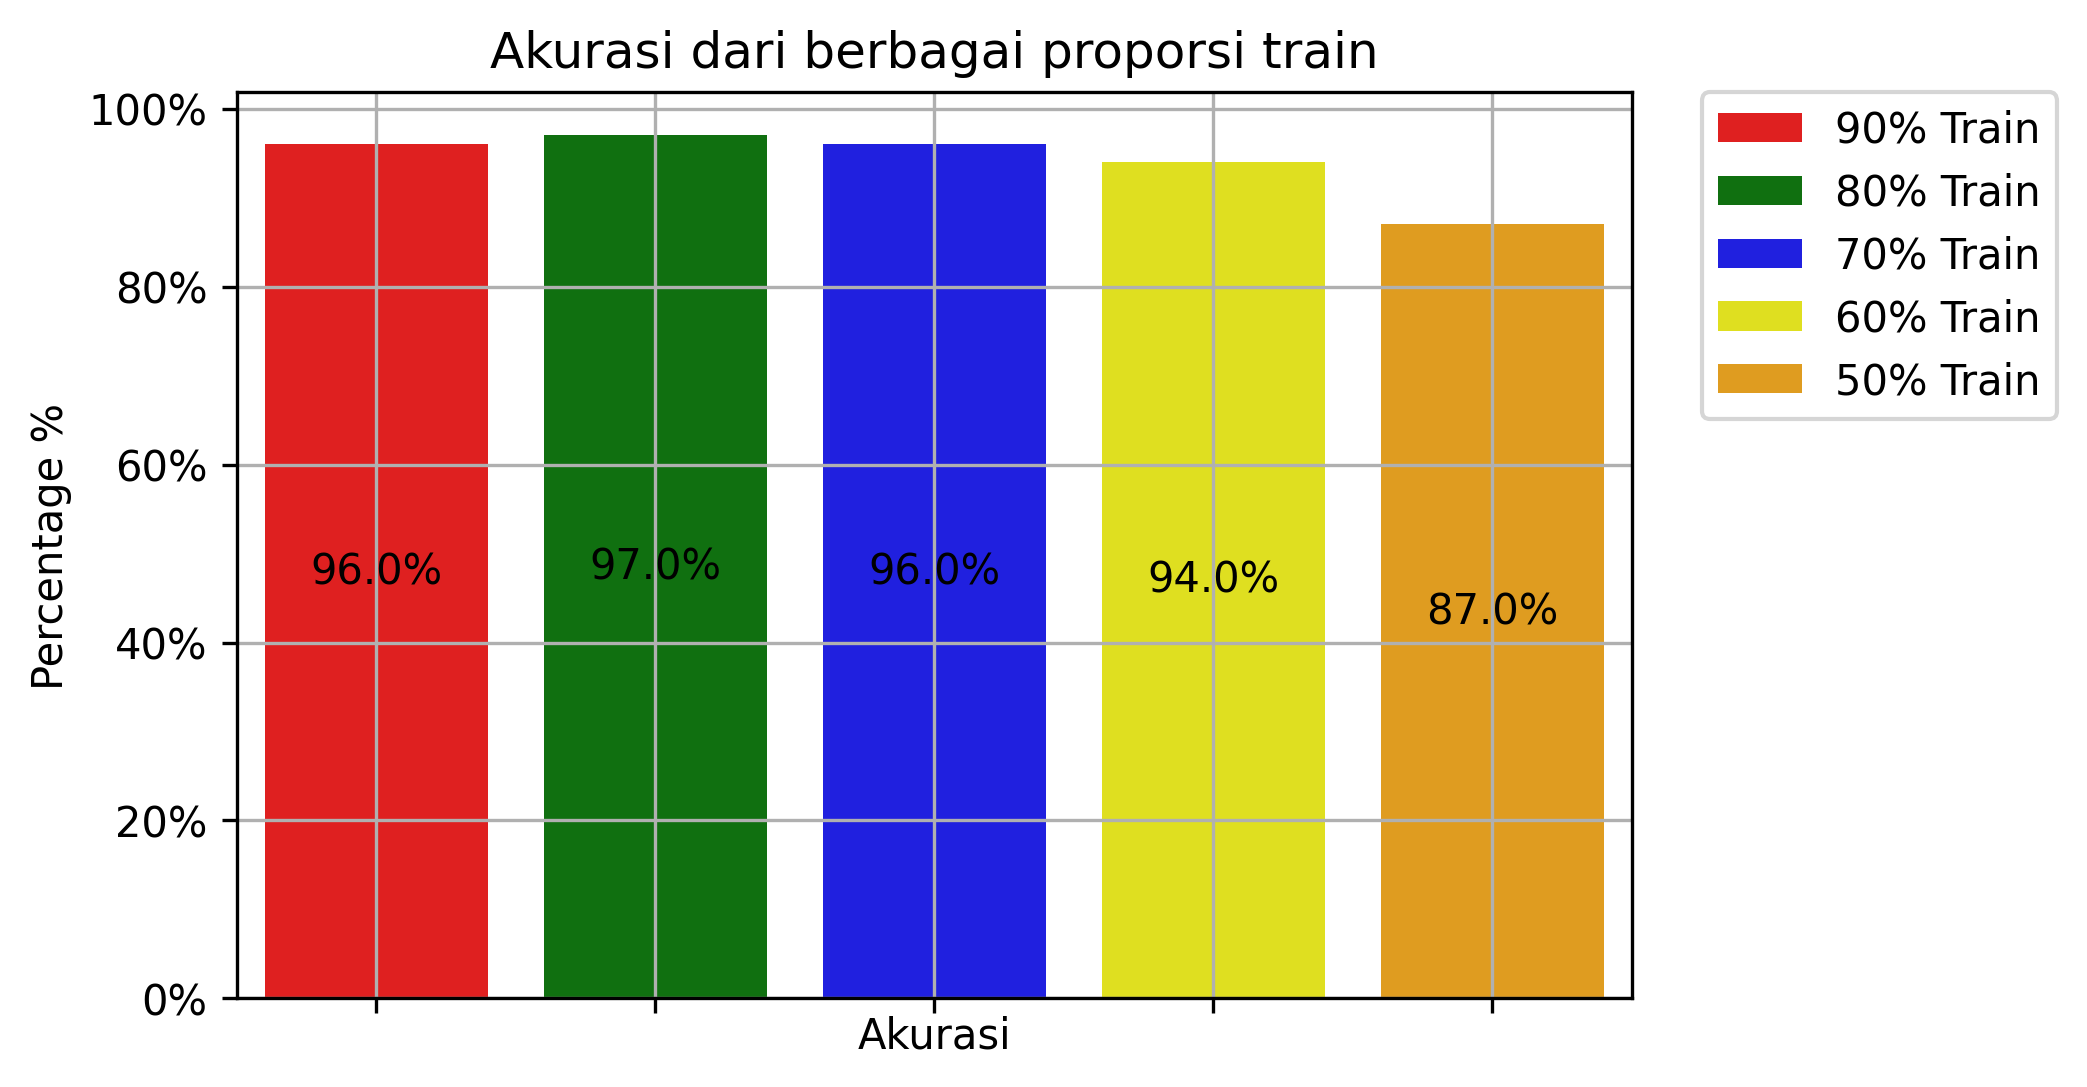

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'orange']
x_labels = ['90% Train', '80% Train', '70% Train', '60% Train', '50% Train']

data = {'Akurasi':x_labels, 'Values':akurasi}
df = pd.DataFrame(data)

bar_plot = sns.barplot(x='Akurasi', y='Values', data=df, palette=colors)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for i in range(len(x_labels)):
  plt.text(i, akurasi[i]/2, '{}%'.format(akurasi[i]*100), ha='center', va='center')
plt.setp(bar_plot.get_xticklabels(), visible=False)
bar_handles = bar_plot.get_children()
plt.ylabel('Percentage %')
plt.legend(bar_handles, x_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Akurasi dari berbagai proporsi train')
plt.grid()
plt.show()

In [ ]:
import pickle
pickle.dump(model, open('model_svc.pkl', 'wb'))
pickle.dump(scaler, open('model_scaler.pkl', 'wb'))
pickle.dump(tv, open('model_tv.pkl', 'wb'))
pickle.dump(pipeline, open('pipeline.pkl', 'wb'))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-49-0149318acf3b>:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['Akurasi', 'Presisi', 'Recall', 'F1'], handles=[akurasi_label, presisi_label, recall_label, f1_label ], bbox_to_anchor=(1.05, 1))


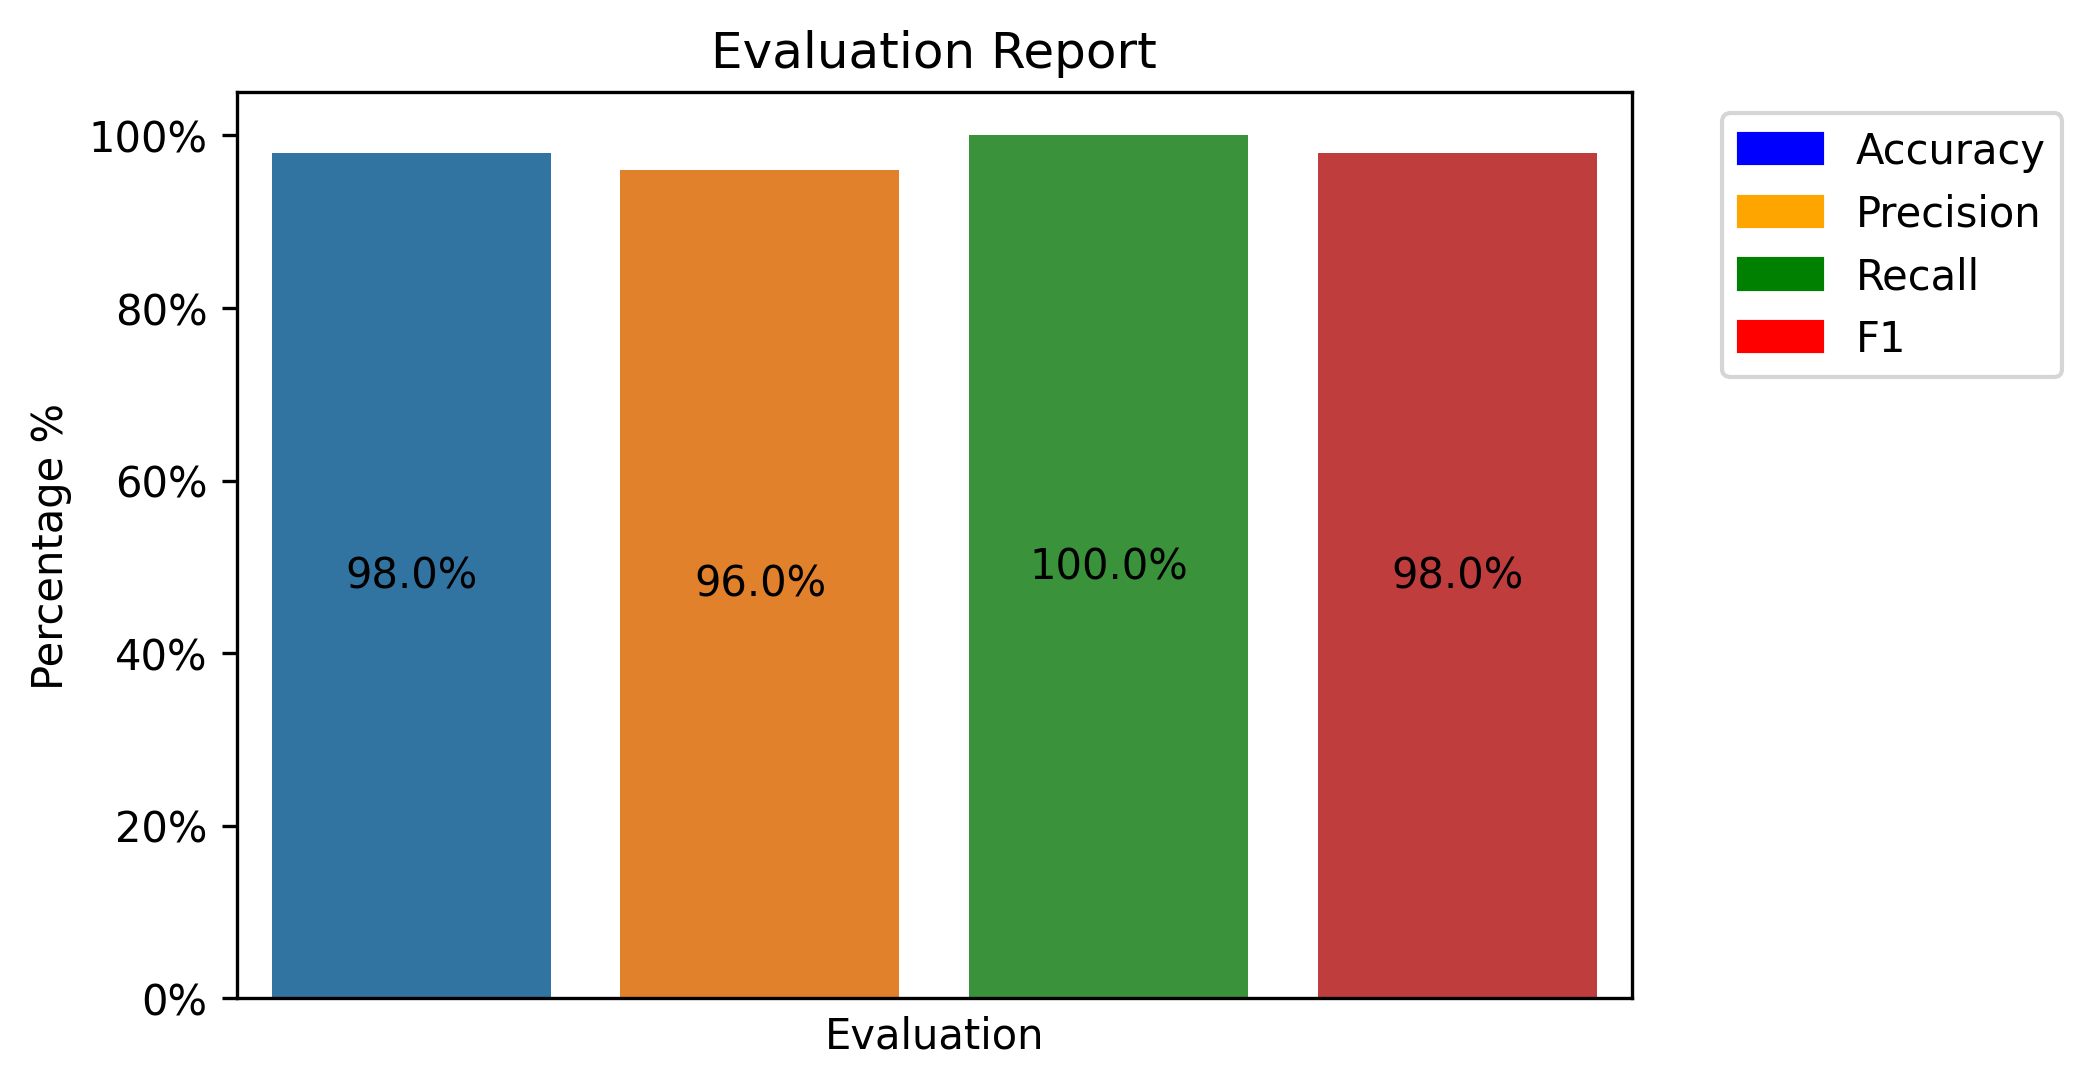

In [ ]:
import matplotlib.patches as mpatches
model = svm.SVC(C=10, gamma=0.1, kernel = 'sigmoid', probability = True)
model.fit(X_over_under, Y_over_under)
predict = model.predict(X_over_under)
presisi = round(precision_score(Y_over_under, predict),2)
recall = round(recall_score(Y_over_under, predict),2)
f1 = round(f1_score(Y_over_under, predict),2)
akurasi = round(accuracy_score(Y_over_under, predict),2)
kumpulan = {'Akurasi': [akurasi],
        'Presisi': [presisi], 
        'Recall' : [recall], 
        'F1' : [f1]}
height = [akurasi, presisi, recall, f1]
width = ['Akurasi', 'Presisi', 'Recall', 'F1']
sns.barplot(width,height,hue=width,dodge=False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for i in range(len(width)):
  plt.text(i, height[i]/2, '{}%'.format(height[i]*100), ha='center', va='center')
plt.title("Evaluation Report")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage %')
plt.xlabel('Evaluation')
akurasi_label = mpatches.Patch(color='blue', label='Accuracy')
presisi_label = mpatches.Patch(color='orange', label='Precision')
recall_label = mpatches.Patch(color='green', label='Recall')
f1_label = mpatches.Patch(color='red', label='F1')
plt.legend(['Akurasi', 'Presisi', 'Recall', 'F1'], handles=[akurasi_label, presisi_label, recall_label, f1_label ], bbox_to_anchor=(1.05, 1))
plt.show()

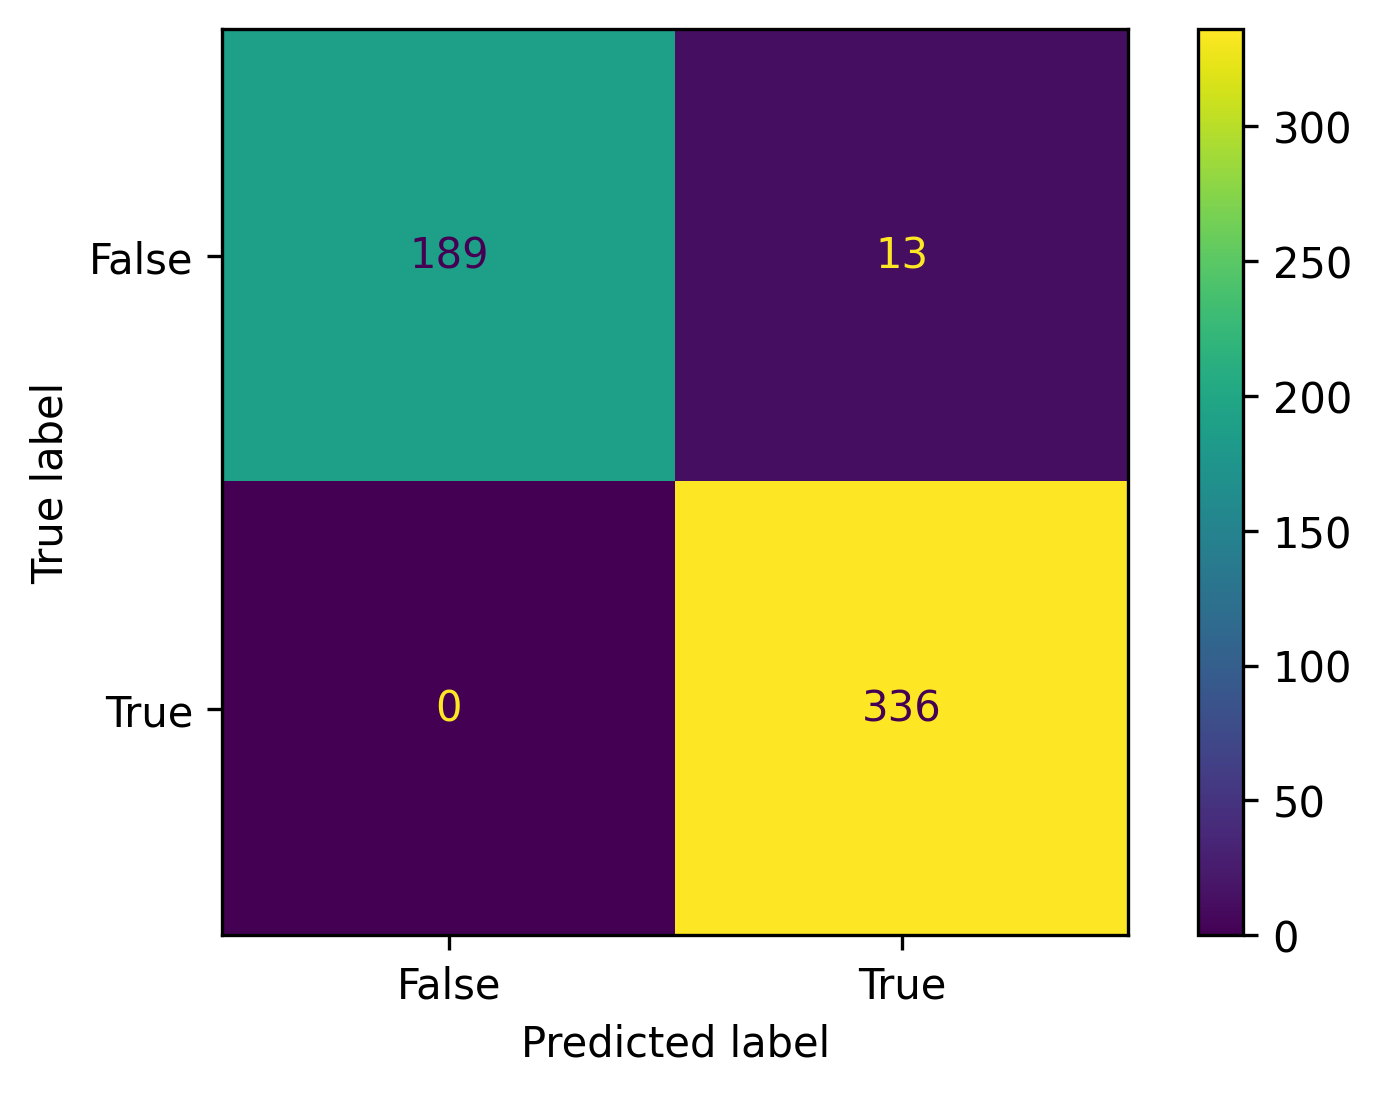

In [ ]:
confusion_matrix = cm(Y_over_under, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

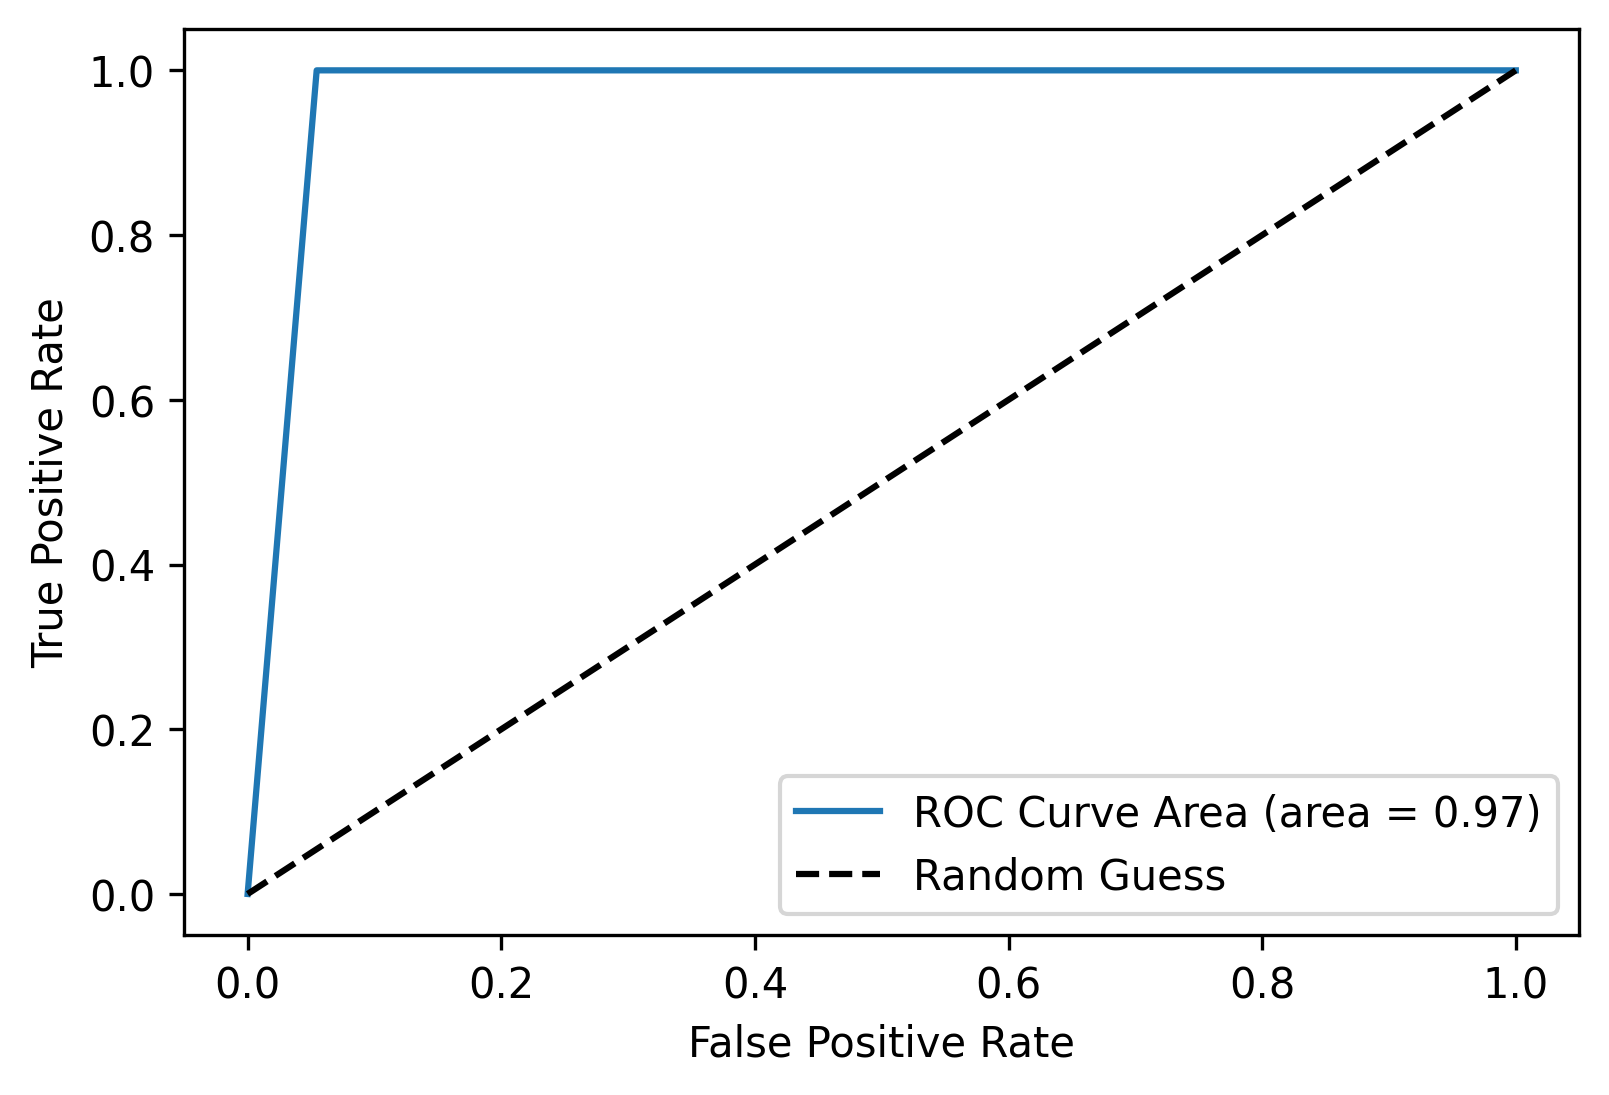

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# true labels of data
y_pred_proba = model.predict_proba(X_over_under)[::,1]
fpr, tpr, thresholds = roc_curve(Y_over_under, y_pred_proba)
auc = roc_auc_score(Y_over_under, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve Area (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()